In [56]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'classes')))

In [57]:
#autoreload
%load_ext autoreload
%autoreload 2

#DAB-SMOTE import
import DAB_SMOTE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Examples per class after resample:  [1500  100   75   80]


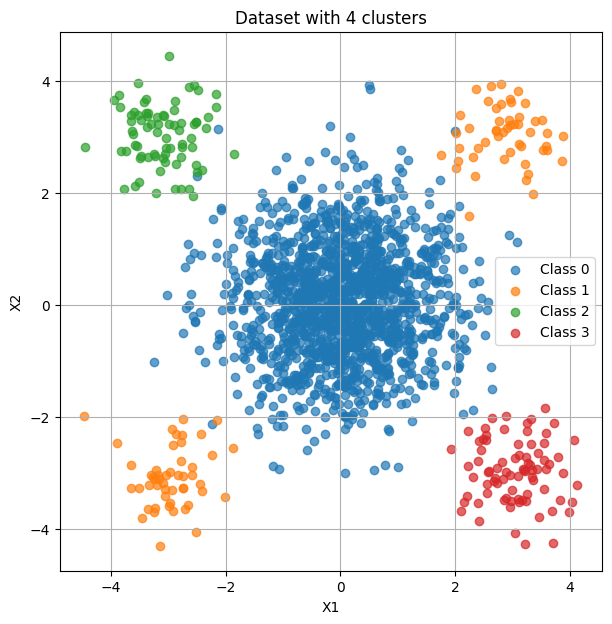

In [58]:
np.random.seed(42)

n_major = 1500

centers = [
    (0, 0),
    (3, 3),
    (-3, 3),
    (3, -3),
    (-3, -3)
]

X = []
y = []

X.append(np.random.normal(loc=centers[0], scale=1.0, size=(n_major, 2)))
y.append(np.zeros(n_major))

X.append(np.random.normal(loc=centers[1], scale=0.5, size=(100//2, 2)))
y.append(np.ones(100//2))

X.append(np.random.normal(loc=centers[2], scale=0.5, size=(75, 2)))
y.append(np.full(75, 2))

X.append(np.random.normal(loc=centers[3], scale=0.5, size=(80, 2)))
y.append(np.full(80, 3))

X.append(np.random.normal(loc=centers[4], scale=0.5, size=(100//2, 2)))
y.append(np.ones(100//2))

X = np.vstack(X)
y = np.hstack(y)

plt.figure(figsize=(7, 7))

for lbl in np.unique(y):
    plt.scatter(
        X[y == lbl, 0],
        X[y == lbl, 1],
        label=f"Class {int(lbl)}",
        alpha=0.7
    )

print("Examples per class after resample: ", np.unique(y, return_counts=True)[1])

plt.title("Dataset with 4 clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()


Examples per class after resample:  [1500 1500 1500 1500]


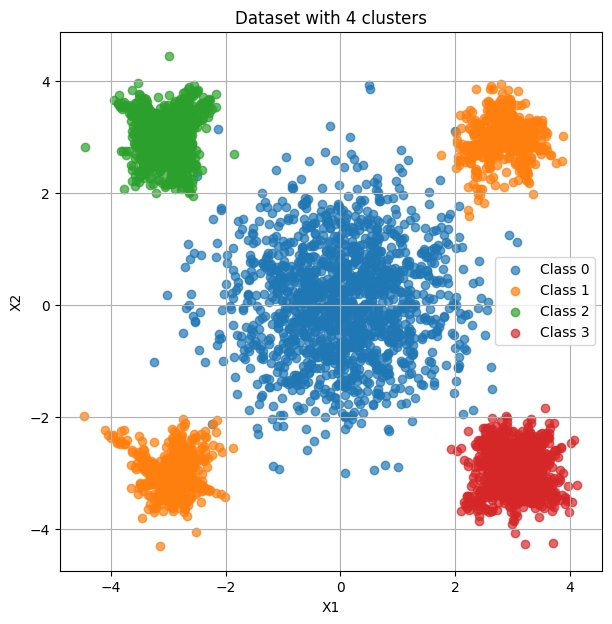

In [59]:
dab = DAB_SMOTE.DAB_SMOTE()
X_new, y_new =dab.fit_resample(X, y)
plt.figure(figsize=(7, 7))

for lbl in np.unique(y):
    plt.scatter(
        X_new[y_new == lbl, 0],
        X_new[y_new == lbl, 1],
        label=f"Class {int(lbl)}",
        alpha=0.7
    )

print("Examples per class after resample: ", np.unique(y_new, return_counts=True)[1])

plt.title("Dataset with 4 clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.legend()
plt.show()